# Clustering

This notebook contains code for running the `KPrototypes` clustering algorithm and identifying the user clusters, or "personas"

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes

%matplotlib inline
plt.style.use('seaborn-notebook')

In [23]:
#retrieve the dataframe we stored in the last notebook
%store -r

In [24]:
# making a copy of the dataframe, which we will then use to process and run clustering on
df_norm = df.copy()

In [25]:
# MinMax Scaler to scale all numeric variables to the same scale for clustering
numeric_cols = list(df.select_dtypes('float64').columns)
scaler = preprocessing.MinMaxScaler()
df_norm[numeric_cols] = scaler.fit_transform(df_norm[numeric_cols])

In [26]:
df_norm.head()

,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,gender,primary_language_commitment,primary_language_review,...,primary_language_proficiency,student,used_other_resources,highest_course_progress,took_placement_test,purchased_subscription,n_days_on_platform,has_daily_goal,pct_days_active,log_lessons_per_day
user_id,,,,,,,,,,,,,,,,,,,,,
35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Male,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,...,Advanced,Not currently a student,True,0.731183,True,False,0.352917,False,0.937500,0.572682
35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Male,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,...,Intermediate,Not currently a student,True,0.150538,True,False,0.051250,True,0.552083,0.528509
35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,...,Beginner,Not currently a student,True,0.225806,False,True,0.198750,False,0.302083,0.526409
35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Female,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,...,Intermediate,Not currently a student,True,0.225806,False,True,0.047917,True,0.958333,0.737771
35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,...,Intermediate,Not currently a student,True,0.795699,False,True,0.812083,False,0.875000,0.571862


In [27]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4614 entries, 35c9fc6e72c911e99681dca9049399ef to 35cf7a1772c911e9b029dca9049399ef
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           4614 non-null   category
 1   annual_income                 4614 non-null   category
 2   country                       4614 non-null   category
 3   duolingo_platform             4614 non-null   category
 4   duolingo_subscriber           4614 non-null   category
 5   duolingo_usage                4614 non-null   category
 6   employment_status             4614 non-null   category
 7   gender                        4614 non-null   category
 8   primary_language_commitment   4614 non-null   category
 9   primary_language_review       4614 non-null   category
 10  primary_language_motivation   4614 non-null   category
 11  primary_language_proficiency  4614 non-null   category

In [28]:
# The algorithm needs to know which columns contain categorical data
catColumnsPos = [df_norm.columns.get_loc(col) for col in list(df_norm.select_dtypes(['bool','category']).columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes(['bool','category']).columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['age', 'annual_income', 'country', 'duolingo_platform', 'duolingo_subscriber', 'duolingo_usage', 'employment_status', 'gender', 'primary_language_commitment', 'primary_language_review', 'primary_language_motivation', 'primary_language_proficiency', 'student', 'used_other_resources', 'took_placement_test', 'purchased_subscription', 'has_daily_goal']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18]


In [29]:
dfMatrix = df_norm.to_numpy()

In [30]:
#let's try to run up to 10 clusters
cost = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 42)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


In [31]:
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost})

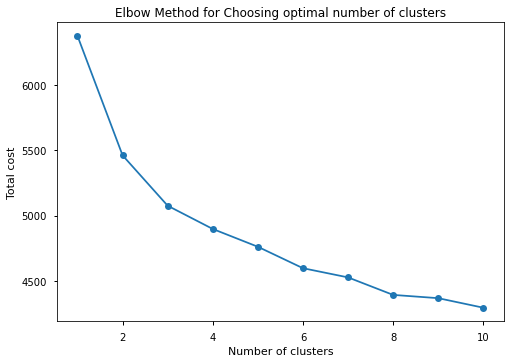

In [49]:
fig, ax = plt.subplots()
ax.plot(df_cost['Cluster'], df_cost['Cost'], 'o-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Total cost')
ax.set_title('Elbow Method for Choosing optimal number of clusters')

plt.savefig("../images/elbow.png", bbox_inches='tight', dpi=60)

plt.show()

From the elbow analysis, we decide to use 3 clusters. Re-running the clustering model with 3 clusters in the next code cell to get our cluster labels

In [33]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 42)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 0, 2, ..., 2, 1, 0], dtype=uint16)

In [34]:
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'A', 1:'B', 2:'C'})

In [35]:
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['A','B','C'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4614 entries, 35c9fc6e72c911e99681dca9049399ef to 35cf7a1772c911e9b029dca9049399ef
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           4614 non-null   category
 1   annual_income                 4614 non-null   category
 2   country                       4614 non-null   category
 3   duolingo_platform             4614 non-null   category
 4   duolingo_subscriber           4614 non-null   category
 5   duolingo_usage                4614 non-null   category
 6   employment_status             4614 non-null   category
 7   gender                        4614 non-null   category
 8   primary_language_commitment   4614 non-null   category
 9   primary_language_review       4614 non-null   category
 10  primary_language_motivation   4614 non-null   category
 11  primary_language_proficiency  4614 non-null   category

This next cell will calculate summary statistics by cluster, or "Segment". For categorical variables where ordering doesn't matter, or is meaningless (like `duolingo_platform`), the mode is taken as representative of the segment. For categorical variables where ordering *does* matter (like income), the median is taken. For numeric variables, the mean is taken.

In [50]:
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
summary = df.groupby('Segment').agg(
    {
        'Total':'count',
        'country': lambda x: x.value_counts().index[0],
        # employment status and student status were not differentiated between clusters
#         'employment_status': lambda x: x.value_counts().index[0],
#         'student': lambda x: x.value_counts().index[0],
        'gender': lambda x: x.value_counts().index[0],
        'age': lambda x: x.value_counts().index[0],
#         'age': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'annual_income': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
#         'annual_income': lambda x: x.value_counts().index[0],
        'duolingo_platform': lambda x: x.value_counts().index[0],
        'duolingo_subscriber': lambda x: x.value_counts().index[0],
#         'duolingo_usage' : lambda x: x.value_counts().index[0],
        'duolingo_usage': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'primary_language_commitment': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'primary_language_proficiency': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'primary_language_review': lambda x: x.value_counts().index[0],
        'primary_language_motivation': lambda x: x.value_counts().index[0],
#         'used_other_resources': lambda x: x.value_counts().index[0],
        'purchased_subscription': lambda x: x.value_counts().index[0],
        'has_daily_goal': lambda x: x.value_counts().index[0],
        'n_days_on_platform': 'mean',
        'highest_course_progress': 'mean',
        'pct_days_active': 'mean',
        'log_lessons_per_day': 'mean'
    }
).reset_index()

In [51]:
summary['lessons_per_day'] = np.exp(summary['log_lessons_per_day'])-1
summary.drop(columns=['log_lessons_per_day'], inplace=True)

In [48]:
summary.to_csv('../ClusterSummary.csv')
summary

,Segment,Total,country,gender,age,annual_income,duolingo_platform,duolingo_subscriber,duolingo_usage,primary_language_commitment,primary_language_proficiency,primary_language_review,primary_language_motivation,purchased_subscription,has_daily_goal,n_days_on_platform,highest_course_progress,pct_days_active,lessons_per_day
0,A,1515,RU,Male,35 - 54,"$11,000 - $25,000",Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,I'm very committed to learning this language.,Intermediate,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,False,False,743.454125,35.574257,0.644748,2.876069
1,B,1302,JP,Female,55 - 74,"$26,000 - $75,000",iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,I'm very committed to learning this language.,Beginner,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,True,True,742.012289,35.163594,0.778097,3.196170
2,C,1797,GB,Female,18-34,"$11,000 - $25,000",Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,I'm moderately committed to learning this lang...,Beginner,I am using Duolingo to learn this language for...,I need to be able to speak the local language ...,False,False,461.380078,16.716750,0.207103,2.892024


In [42]:
df_clusters = df.copy()

In [43]:
# storing the dataframe for post-clustering data analysis in the next notebook
%store df_clusters

Stored 'df_clusters' (DataFrame)
